In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

import matplotlib.pyplot as plt
import seaborn as sns
from palettable.colorbrewer.qualitative import Pastel1_7

from scipy import stats

from wrappers import ResultWrapper

from yellowbrick.regressor import residuals_plot
from yellowbrick.regressor import prediction_error

import warnings
warnings.filterwarnings('ignore')

RANDOM_SEED = 671993

In [2]:
df = pd.read_csv('../data/forbes_2000_cleaned_outliers_iqr_range.csv')

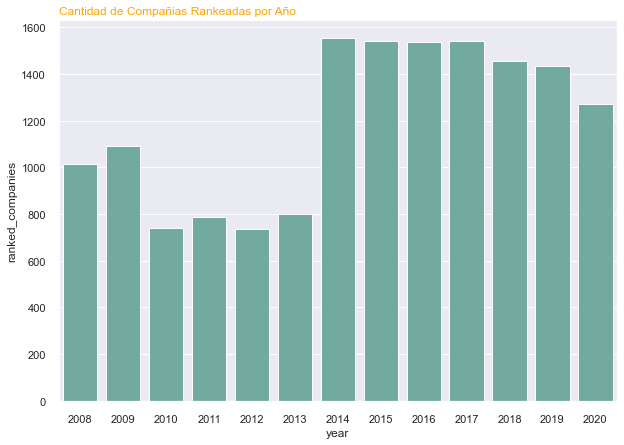

In [3]:
ranked_companies = pd.DataFrame({
    'year': sorted(df.year.unique()),
    'ranked_companies': np.array(df.year.value_counts().sort_index())
})

# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# load dataset
tips = sns.load_dataset("tips")

# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
sns.barplot(
    y="ranked_companies",
    x="year",
    data=ranked_companies,
    estimator=sum,
    ci=None,
    color='#69b3a2'
)

plt.title(
    f'Cantidad de Compañias Rankeadas por Año',
    loc='left',
    fontsize=12,
    fontweight=0,
    color='orange'
)

# Show graphic
plt.show()


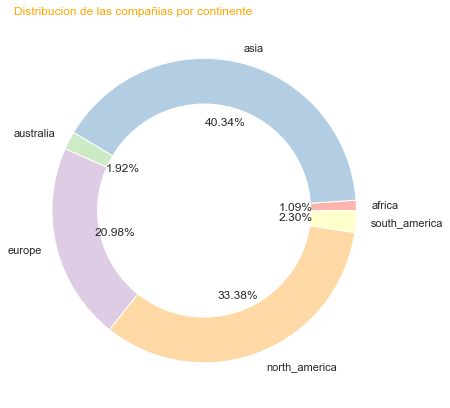

In [4]:
# Set the figure size
plt.figure(figsize=(10, 7))

# create data
names = sorted(df.continent.unique())
size = np.array(df.continent.value_counts().sort_index())

# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

plt.pie(size, labels=names, colors=Pastel1_7.hex_colors, autopct='%1.2f%%')
p = plt.gcf()
p.gca().add_artist(my_circle)

plt.title(
    f'Distribucion de las compañias por continente',
    loc='left',
    fontsize=12,
    fontweight=0,
    color='orange'
)

# Show the graph
plt.show()

In [5]:
correlation = df.drop(['year','rank'], axis=1).corr(method='spearman')
correlation

,market_value,profits,assets,sales,cost
market_value,1.000000,0.376975,0.084847,0.145309,0.112915
profits,0.376975,1.000000,-0.339543,0.263041,0.014670
assets,0.084847,-0.339543,1.000000,-0.033290,0.122086
sales,0.145309,0.263041,-0.033290,1.000000,0.937285
cost,0.112915,0.014670,0.122086,0.937285,1.000000


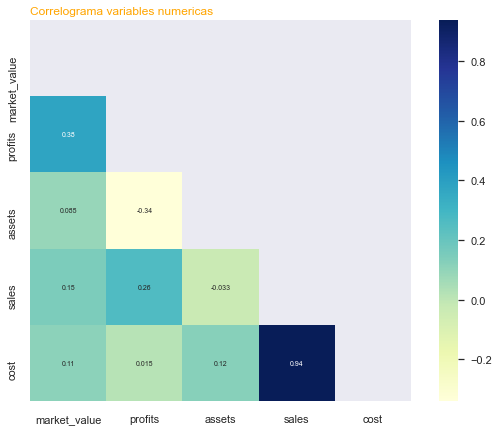

In [6]:
# Set the figure size
plt.figure(figsize=(10, 7))

# Can be great to plot only a half matrix
# Generate a mask for the upper triangle
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(
    correlation,
    cmap="YlGnBu",
    square=True,
    mask=mask,
    annot=True,
    annot_kws={"size": 7},
    linecolor='yellow'
)

plt.title(
    f'Correlograma variables numericas',
    loc='left',
    fontsize=12,
    fontweight=0,
    color='orange'
)

# Show the graph
plt.show()

In [7]:
df.drop(['year','rank'], axis=1).describe()

,market_value,profits,assets,sales,cost
count,15496.000000,15496.000000,15496.000000,15496.000000,15496.000000
mean,11.580005,1.491233,18.378448,10.848811,9.357578
std,9.484464,2.208284,19.156937,9.563720,9.420618
min,0.000000,-5.495500,-7.380000,-4.390000,-8.200000
25%,4.767750,0.360000,4.287000,3.900000,2.490750
50%,8.887000,0.685900,12.308500,8.176500,6.675400
75%,15.431000,1.581250,26.324000,14.444000,13.018325
max,48.059000,10.560000,90.230000,54.600000,45.719900


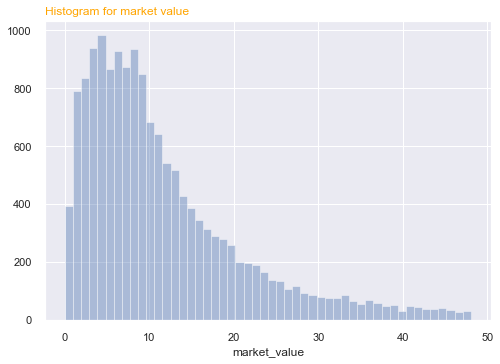

In [8]:
sns.distplot(
    a=df["market_value"],
    hist=True,
    kde=False,
    rug=False
)
plt.title(
    f'Histogram for market value',
    loc='left',
    fontsize=12,
    fontweight=0,
    color='orange'
)
plt.show()

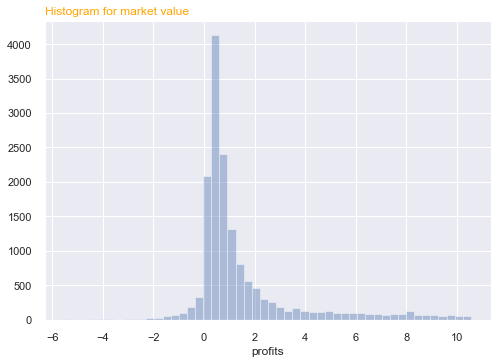

In [9]:
sns.distplot(
    a=df["profits"],
    hist=True,
    kde=False,
    rug=False
)
plt.title(
    f'Histogram for market value',
    loc='left',
    fontsize=12,
    fontweight=0,
    color='orange'
)
plt.show()

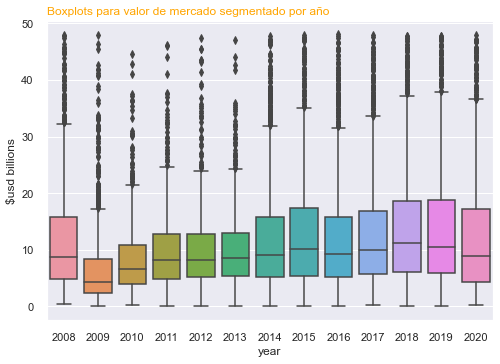

In [10]:
sns.boxplot(
    x=df["year"],
    y=df["market_value"]
)
plt.title(
    f'Boxplots para valor de mercado segmentado por año',
    loc='left',
    fontsize=12,
    fontweight=0,
    color='orange'
)
plt.xlabel('year')
plt.ylabel('$usd billions')
plt.show()

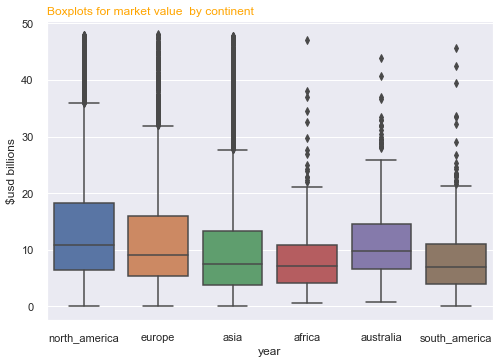

In [11]:
sns.boxplot(
    x=df["continent"],
    y=df["market_value"]
)
plt.title(
    f'Boxplots for market value  by continent',
    loc='left',
    fontsize=12,
    fontweight=0,
    color='orange'
)
plt.xlabel('year')
plt.ylabel('$usd billions')
plt.show()

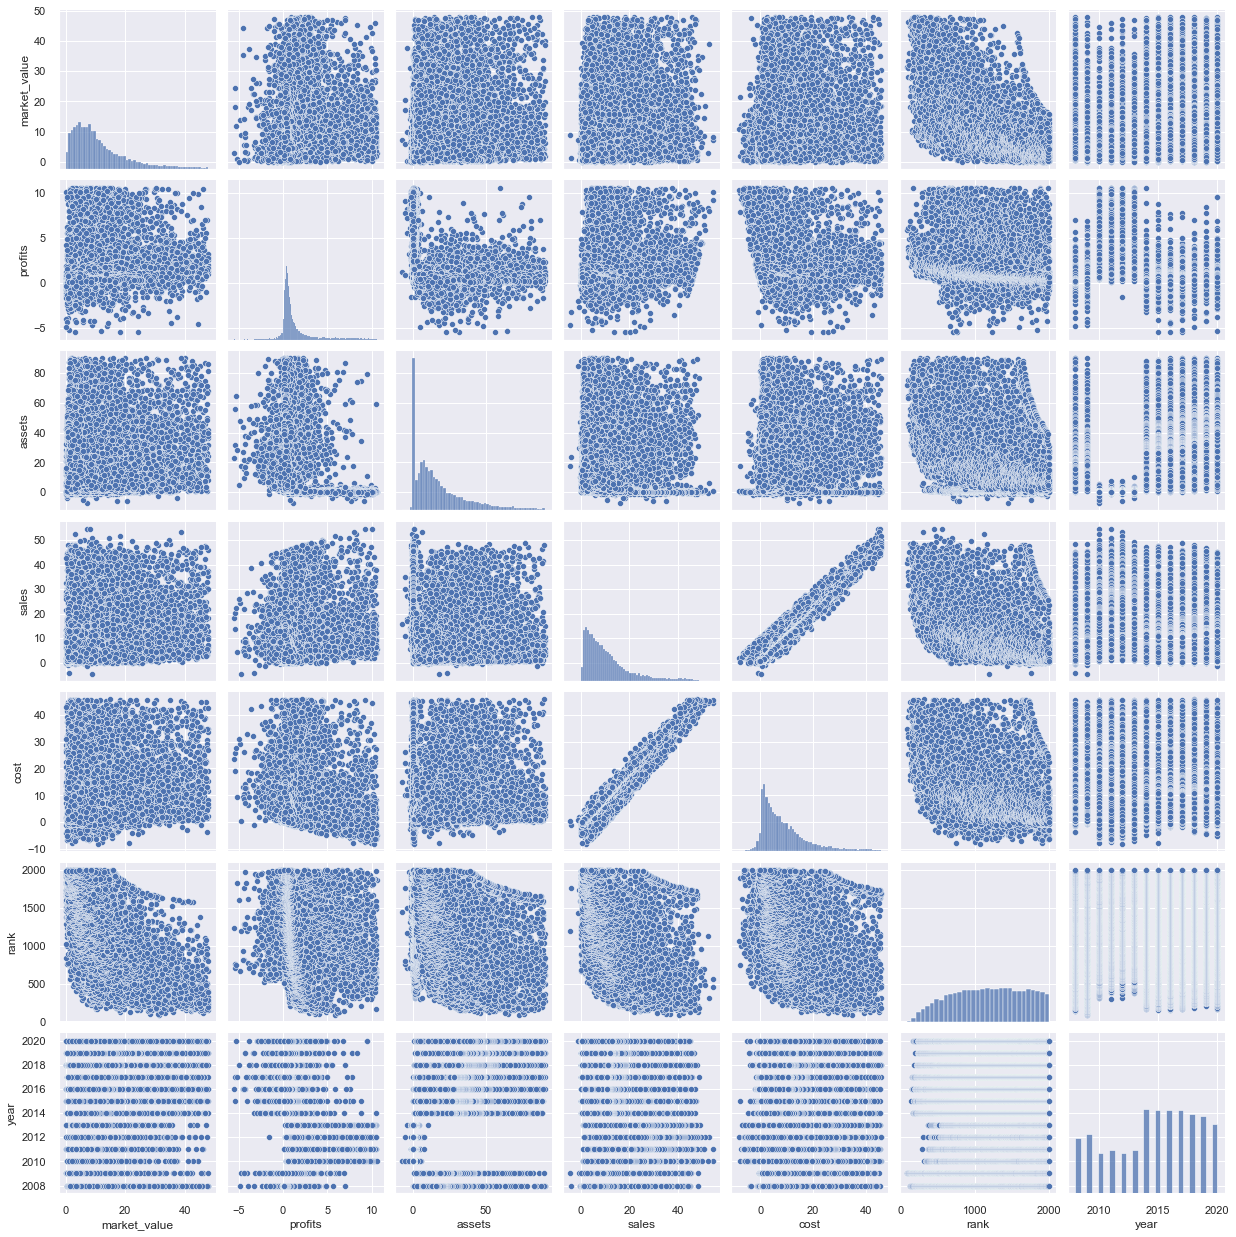

In [12]:
# Pair plot IQR dataframe
sns.pairplot(df)
plt.show()

In [13]:
# SIMPLE LINEAR REGRESSION (profits)

x=df['profits']
y=df['market_value']

X_train, X_test, y_train, y_test = train_test_split(
    x.values.reshape(-1,1),
    y.values.reshape(-1,1),
    test_size=0.33,
    random_state=RANDOM_SEED
)

In [14]:
linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

LinearRegression()

In [15]:
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     180.6
Date:                Sat, 17 Jul 2021   Prob (F-statistic):           7.78e-41
Time:                        00:02:16   Log-Likelihood:                -37884.
No. Observations:               10382   AIC:                         7.577e+04
Df Residuals:                   10380   BIC:                         7.579e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.7175      0.110     97.324      0.0

In [16]:
# Print the Intercept:
print('intercept:', linear_model.intercept_)

# Print the Slope:
print(f'slope: profits ->', linear_model.coef_ )

intercept: [10.71746951]
slope: profits -> [[0.55874611]]


In [17]:
y_pred = linear_model.predict(X_test)

lm_wrapper = ResultWrapper(
    y_test=y_test,
    y_pred=y_pred
)


In [18]:
linear_reg_results = pd.DataFrame({'actual': y_test.flatten(), 'prediction': y_pred.flatten()})
linear_reg_results

,actual,prediction
0,1.230,15.751772
1,9.700,11.164466
2,14.100,11.667338
3,1.770,10.813574
4,3.600,15.913808
...,...,...
5109,12.086,10.972705
5110,18.560,11.371202
5111,6.651,11.111777
5112,17.400,11.499714


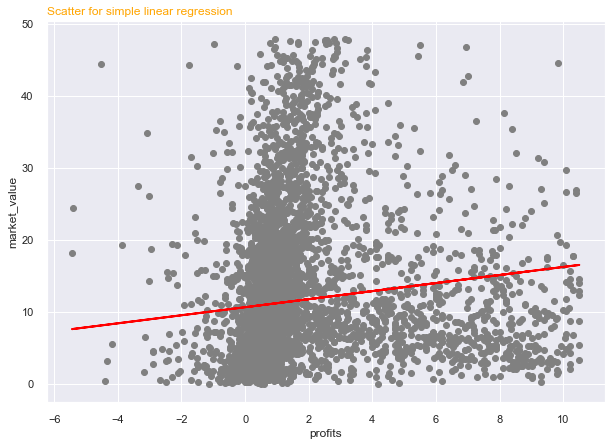

In [19]:
fig = plt.figure(figsize = (10, 7))

plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title(
    f'Scatter for simple linear regression',
    loc='left',
    fontsize=12,
    fontweight=0,
    color='orange'
)
plt.xlabel('profits')
plt.ylabel('market_value')
plt.show()

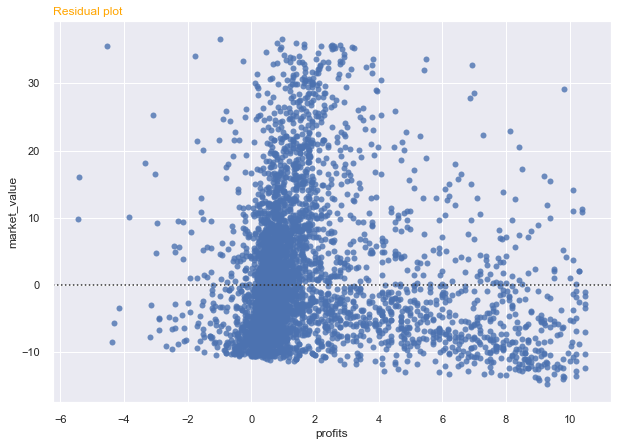

In [20]:
fig = plt.figure(figsize = (10, 7))
sns.residplot(X_test, y_test)

# title and labels
plt.title(
    'Residual plot',
    loc='left',
    fontsize=12,
    fontweight=0,
    color='orange'
)
plt.xlabel('profits')
plt.ylabel('market_value')
plt.show()

In [21]:
# Durbin-Watson test to test if errors are independent

sms.stattools.durbin_watson(lm_wrapper.residuals())

array([1.98419627])

In [22]:
# Given the statistical value of 1.98,
# the test provides evidence that there is no serial correlation present
# meaning the residual error terms are uncorrelated and are independent

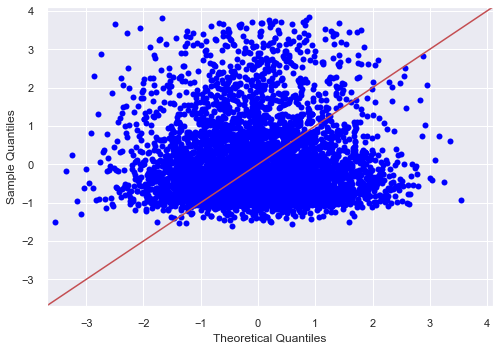

In [23]:
sm.qqplot(lm_wrapper.residuals(), stats.norm, fit=True, line="45")
plt.show()

In [24]:
lm_wrapper.print()

R2 Square: 0.010840149088086282
Mean Absolute Error: 7.249198478698002
Mean Squared Error: 92.85790888605331
Root Mean Squared Error: 9.63628086380079


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15496 entries, 0 to 15495
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       15496 non-null  object 
 1   industry      15496 non-null  object 
 2   sector        15496 non-null  object 
 3   country       15496 non-null  object 
 4   continent     15496 non-null  object 
 5   market_value  15496 non-null  float64
 6   profits       15496 non-null  float64
 7   assets        15496 non-null  float64
 8   sales         15496 non-null  float64
 9   cost          15496 non-null  float64
 10  rank          15496 non-null  int64  
 11  year          15496 non-null  int64  
dtypes: float64(5), int64(2), object(5)
memory usage: 1.4+ MB


In [26]:
industry_dummies = pd.get_dummies(df.industry, prefix='industry')
sector_dummies = pd.get_dummies(df.sector, prefix='sector')
continent_dummies = pd.get_dummies(df.continent, prefix='continent')
country_dummies = pd.get_dummies(df.country, prefix='country')

df = pd.concat(
    [df,industry_dummies,sector_dummies,continent_dummies,country_dummies],
    axis=1
)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15496 entries, 0 to 15495
Columns: 187 entries, company to country_vietnam
dtypes: float64(5), int64(2), object(5), uint8(175)
memory usage: 4.0+ MB


In [28]:
np.quantile(
    df['rank'],
    [0.2,0.4,0.6,0.8]
)

array([ 713., 1042., 1351., 1666.])

In [29]:
# MULTIPLE LINEAR REGRESSION

x=df.drop(['company','market_value','year','industry','sector','country','continent'], axis=1)
y=df['market_value']

In [30]:
len(x.columns)

180

In [31]:
corr_list = []
for column in x:
    corr_x=x[column]
    corr = stats.pointbiserialr(list(corr_x), list(y))
    corr_list.append({
        'metric': column,
        'corr': corr.correlation,
        'p-value': corr.pvalue
    })

correlations = pd.DataFrame(corr_list)

In [32]:
significant_corr = correlations[correlations['p-value'] < 0.05]
significant_corr['abs(corr)'] = np.abs(significant_corr['corr'])
significant_corr.sort_values(by='abs(corr)', ascending=False)

,metric,corr,p-value,abs(corr)
4,rank,-0.642360,0.000000e+00,0.642360
92,sector_financials,-0.262834,3.499290e-243,0.262834
74,industry_regional_banks,-0.256600,1.727777e-231,0.256600
2,sales,0.161965,1.442687e-91,0.161965
104,continent_north_america,0.151693,2.000843e-80,0.151693
...,...,...,...,...
42,industry_food_processing,0.016569,3.916021e-02,0.016569
176,country_united_kingdom_south_africa,-0.016317,4.223347e-02,0.016317
144,country_mexico,0.016187,4.390564e-02,0.016187
142,country_malaysia,-0.016040,4.586681e-02,0.016040


In [33]:
def get_selected_variance_df(df, threshold: float):
    print(f'threshold -> {threshold}')
    thresholder = VarianceThreshold(threshold=threshold)

    thresholder.fit(df)
    mask = thresholder.get_support()
    new_df = df.loc[:,mask]
    print(f'features -> {len(new_df.columns)}')
    return new_df


def test_variance_df(x,y):
    X_train, X_test, y_train, y_test = train_test_split(
        x,
        y,
        test_size=0.33,
        random_state=RANDOM_SEED
    )

    # Init, fit, score
    forest = RandomForestRegressor(random_state=RANDOM_SEED)

    forest.fit(X_train, y_train)

    train_score = forest.score(X_train, y_train)
    test_score = forest.score(X_test, y_test)

    return {
        'train_score': train_score,
        'test_score': test_score
    }

In [34]:
scores=[]
for threshold in [.005,.008,.01,.02,.03,1]:
    print('Feature Variance Test')
    print('---------------------')
    variance_x = get_selected_variance_df(x, threshold)
    regressor_score = test_variance_df(variance_x,y)
    print(f"train: {regressor_score['train_score']}")
    print(f"test {regressor_score['test_score']}")
    scores.append(regressor_score)
    print('\n')


Feature Variance Test
---------------------
threshold -> 0.005
features -> 108
train: 0.9612573904938018
test 0.7171906968495236


Feature Variance Test
---------------------
threshold -> 0.008
features -> 86
train: 0.960383613862024
test 0.7130854192125801


Feature Variance Test
---------------------
threshold -> 0.01
features -> 75
train: 0.9603123524001994
test 0.7119992049430964


Feature Variance Test
---------------------
threshold -> 0.02
features -> 42
train: 0.9588385436359723
test 0.7065492970496028


Feature Variance Test
---------------------
threshold -> 0.03
features -> 27
train: 0.9580604921612433
test 0.7009377342533489


Feature Variance Test
---------------------
threshold -> 1
features -> 5
train: 0.9531399165205142
test 0.6541480000835735




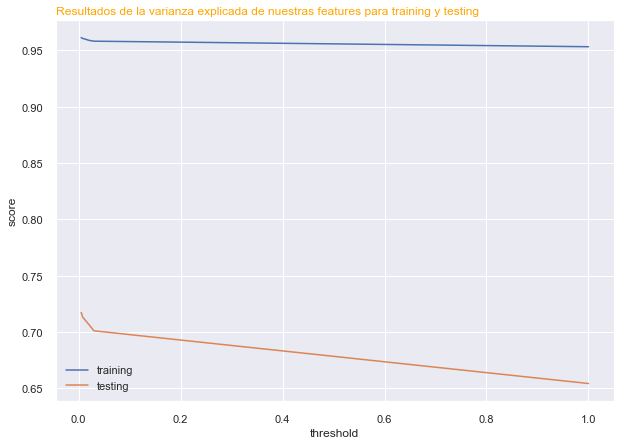

In [35]:
df_scores=pd.DataFrame(scores)

fig = plt.figure(figsize = (10, 7))

plt.plot(
    [.005,.008,.01,.02,.03,1],
    df_scores.train_score,
    label='training'
)
plt.plot(
    [.005,.008,.01,.02,.03,1],
    df_scores.test_score,
    label='testing'
)
plt.title(
    f'Resultados de la varianza explicada de nuestras features para training y testing',
    loc='left',
    fontsize=12,
    fontweight=0,
    color='orange'
)
plt.xlabel('threshold')
plt.ylabel('score')
plt.legend()
plt.show()

In [36]:
# From a Variance Threshold point of view,
# best result would be to use 0.03 threshold
# which involves 27 variables for linear regression model

In [37]:
x=get_selected_variance_df(x, threshold=.03)
X_train, X_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.33,
    random_state=RANDOM_SEED
)

mlr_model = LinearRegression().fit(X_train, y_train)

threshold -> 0.03
features -> 27


In [38]:
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:           market_value   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     407.5
Date:                Sat, 17 Jul 2021   Prob (F-statistic):               0.00
Time:                        00:02:56   Log-Likelihood:                -34316.
No. Observations:               10382   AIC:                         6.869e+04
Df Residuals:                   10355   BIC:                         6.888e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [39]:
# Print the Intercept:
print('intercept:', mlr_model.intercept_)

# Print the Slope:
coeff_df = pd.DataFrame(
    lzip(x.columns,mlr_model.coef_),
    columns=['variable','value']
)
coeff_df

intercept: 31.37781314399576


,variable,value
0,profits,-0.101602
1,assets,-0.008875
2,sales,-0.118362
3,cost,-0.016760
4,rank,-0.013658
5,industry_electric_utilities,-1.356495
6,industry_investment_services,3.575602
7,industry_oil_gas_operations,1.562644
8,industry_real_estate,4.514889
9,industry_regional_banks,1.905438


In [40]:
y_pred = mlr_model.predict(X_test)

mlr_wrapper = ResultWrapper(
    y_test=y_test,
    y_pred=y_pred
)

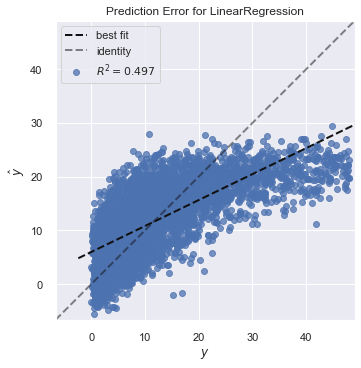

PredictionError(ax=<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>,
                estimator=LinearRegression())

In [41]:
# Making the Prediction Error Plot
prediction_error(mlr_model, X_train, y_train, X_test, y_test)

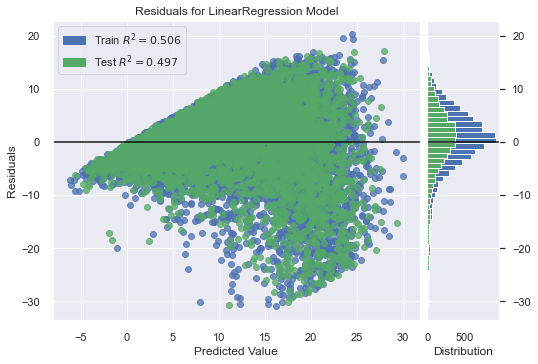

AttributeError: 'LinearRegression' object has no attribute 'line_color'

AttributeError: 'LinearRegression' object has no attribute 'line_color'

In [42]:
# Making the Residuals Plot
residuals_plot(mlr_model, X_train, y_train, X_test, y_test)

In [43]:
mlr_results = pd.DataFrame({'actual': y_test, 'prediction': y_pred})
mlr_results['residuals'] = mlr_wrapper.residuals()
mlr_results

,actual,prediction,residuals
2192,1.230,13.642244,-12.412244
5967,9.700,12.938071,-3.238071
14359,14.100,19.342565,-5.242565
14122,1.770,-0.012686,1.782686
4796,3.600,6.152192,-2.552192
...,...,...,...
10874,12.086,9.140404,2.945596
250,18.560,19.322001,-0.762001
10212,6.651,14.235168,-7.584168
3166,17.400,13.118223,4.281777


In [44]:
# Durbin-Watson test to test if errors are independent

sms.stattools.durbin_watson(mlr_wrapper.residuals())

1.996023122107638

In [45]:
# Given the statistical value of 1.996,
# the test provides evidence that there is no serial correlation present
# meaning the residual error terms are uncorrelated and are independent

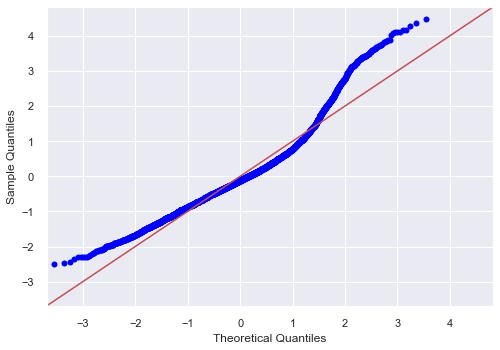

In [46]:
sm.qqplot(mlr_wrapper.residuals(), stats.norm, fit=True, line="45")
plt.show()

In [47]:
mlr_wrapper.print()

R2 Square: 0.49747033238568317
Mean Absolute Error: 5.018084862041558
Mean Squared Error: 47.17524073065555
Root Mean Squared Error: 6.868423453068073


In [48]:
# DECISION TREES & RANDOM FOREST
x=df.drop(['company','market_value','year','industry','sector','country','continent'], axis=1)
y=df['market_value']

X_train, X_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.33,
    random_state=RANDOM_SEED
)

In [49]:
scaler = StandardScaler()

train_scaled = scaler.fit_transform(X_train)
test_scaled = scaler.transform(X_test)


In [50]:
tree_model = DecisionTreeRegressor(
    random_state=RANDOM_SEED
)

tree_model.fit(train_scaled, y_train)

y_pred = tree_model.predict(test_scaled)

In [51]:
tree_wrapper = ResultWrapper(
    y_test=y_test,
    y_pred=y_pred
)

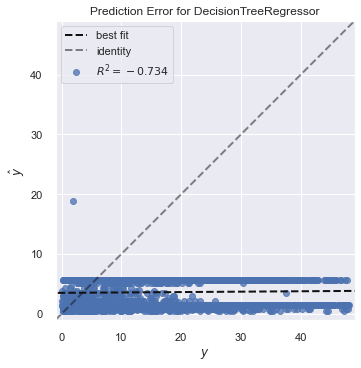

PredictionError(ax=<AxesSubplot:title={'center':'Prediction Error for DecisionTreeRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>,
                estimator=DecisionTreeRegressor(random_state=671993))

In [52]:
# Making the Prediction Error Plot
prediction_error(tree_model, X_train, y_train, X_test, y_test)

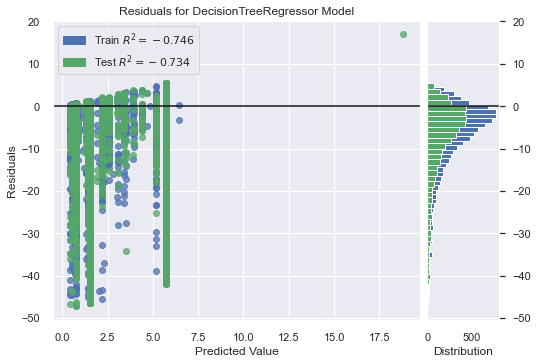

AttributeError: 'DecisionTreeRegressor' object has no attribute 'line_color'

AttributeError: 'DecisionTreeRegressor' object has no attribute 'line_color'

In [53]:
# Making the Residuals Plot
residuals_plot(tree_model, X_train, y_train, X_test, y_test)

In [54]:
tree_results = pd.DataFrame({'actual': y_test, 'prediction': y_pred})
tree_results['residuals'] = tree_wrapper.residuals()
tree_results

,actual,prediction,residuals
2192,1.230,14.100,-12.870
5967,9.700,20.263,-10.563
14359,14.100,13.700,0.400
14122,1.770,5.224,-3.454
4796,3.600,4.300,-0.700
...,...,...,...
10874,12.086,10.300,1.786
250,18.560,32.500,-13.940
10212,6.651,13.058,-6.407
3166,17.400,22.700,-5.300


In [55]:
# Durbin-Watson test to test if errors are independent

sms.stattools.durbin_watson(tree_wrapper.residuals())

2.0294285332810187

In [56]:
# Given the statistical value of 2.032,
# the test provides evidence that there is no serial correlation present
# meaning the residual error terms are uncorrelated and are independent

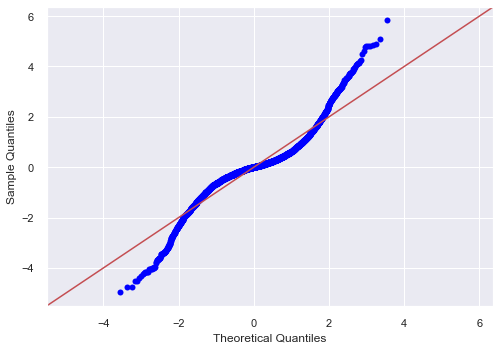

In [57]:
sm.qqplot(tree_wrapper.residuals(), stats.norm, fit=True, line="45")
plt.show()

In [58]:
tree_wrapper.print()

R2 Square: 0.4692093145312267
Mean Absolute Error: 4.483054556120454
Mean Squared Error: 49.82825886370747
Root Mean Squared Error: 7.058913433645965


In [59]:
rf_model = RandomForestRegressor(
    random_state=RANDOM_SEED
)

rf_model.fit(train_scaled, y_train)

y_pred = rf_model.predict(test_scaled)

In [60]:
rf_wrapper = ResultWrapper(
    y_test=y_test,
    y_pred=y_pred
)

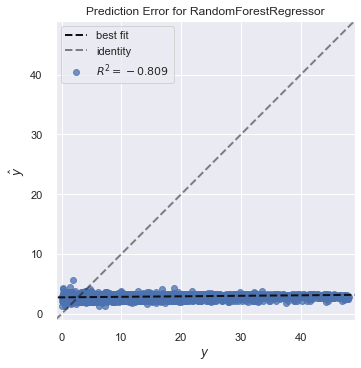

PredictionError(ax=<AxesSubplot:title={'center':'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>,
                estimator=RandomForestRegressor(random_state=671993))

In [61]:
# Making the Prediction Error Plot
prediction_error(rf_model, X_train, y_train, X_test, y_test)

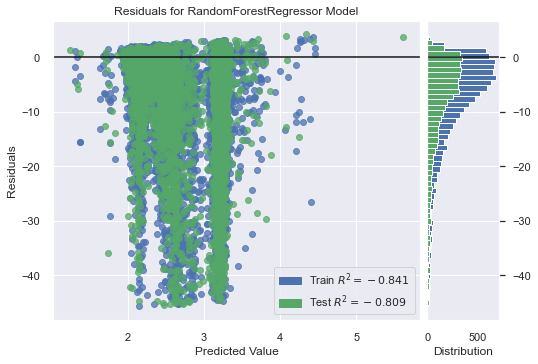

AttributeError: 'RandomForestRegressor' object has no attribute 'line_color'

AttributeError: 'RandomForestRegressor' object has no attribute 'line_color'

In [62]:
# Making the Residuals Plot
residuals_plot(rf_model, X_train, y_train, X_test, y_test)

In [63]:
rf_results = pd.DataFrame({'actual': y_test, 'prediction': y_pred})
rf_results['residuals'] = rf_wrapper.residuals()
rf_results

,actual,prediction,residuals
2192,1.230,12.61168,-11.38168
5967,9.700,15.29655,-5.59655
14359,14.100,16.66217,-2.56217
14122,1.770,3.55768,-1.78768
4796,3.600,3.18675,0.41325
...,...,...,...
10874,12.086,12.70259,-0.61659
250,18.560,21.80258,-3.24258
10212,6.651,9.66739,-3.01639
3166,17.400,20.29191,-2.89191


In [64]:
# Durbin-Watson test to test if errors are independent

sms.stattools.durbin_watson(rf_wrapper.residuals())

1.9737714219962657

In [65]:
# Given the statistical value of 1.972,
# the test provides evidence that there is no serial correlation present
# meaning the residual error terms are uncorrelated and are independent

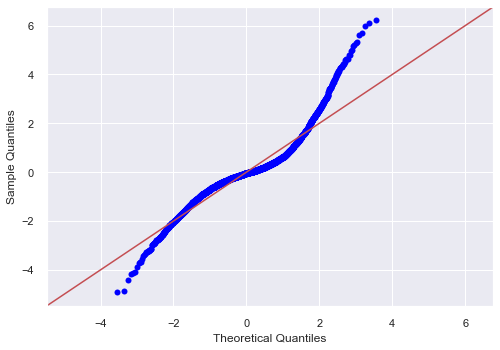

In [66]:
sm.qqplot(rf_wrapper.residuals(), stats.norm, fit=True, line="45")
plt.show()

In [67]:
rf_wrapper.print()

R2 Square: 0.7188298528240924
Mean Absolute Error: 3.3217611947594836
Mean Squared Error: 26.394997617289736
Root Mean Squared Error: 5.1376062146966595


In [68]:
# XGBOOST MODEL
x=df.drop(['company','market_value','year','industry','sector','country','continent'], axis=1)
y=df['market_value']

X_train, X_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.33,
    random_state=RANDOM_SEED
)

In [69]:
# Instantiate an XGBoost object with hyperparameters
xgb_reg = xgb.XGBRegressor(
    max_depth=3,
    n_estimators=100,
    n_jobs=2,
    objectvie='reg:squarederror',
    booster='gbtree',
    random_state=RANDOM_SEED,
    learning_rate=0.05
)

# Train the model with train data sets
xgb_reg.fit(X_train, y_train)

y_pred = xgb_reg.predict(X_test) # Predictions

[00:03:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "objectvie" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [70]:
xg_wrapper = ResultWrapper(
    y_test=y_test,
    y_pred=y_pred
)

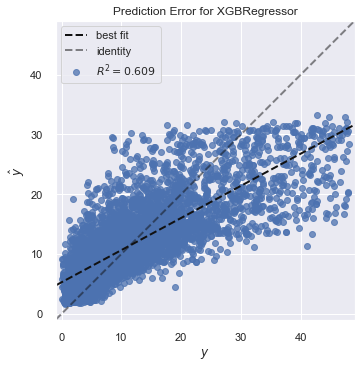

PredictionError(ax=<AxesSubplot:title={'center':'Prediction Error for XGBRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>,
                estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                       colsample_bylevel=1, colsample_bynode=1,
                                       colsample_bytree=1, gamma=0, gpu_id=-1,
                                       importance_type='gain',
                                       interaction_constraints='',
                                       learning_rate=0.05, max_delta_step=0,
                                       max_depth=3, min_child_weight=1,
                                       missing=nan, monotone_constraints='()',
                                       n_estimators=100, n_jobs=2,
                                       num_parallel_tree=1,
                                       objectvie='reg:squarederror',
                                       random_state=671993, reg_alpha=0,
                   

In [71]:
# Making the Prediction Error Plot
prediction_error(xgb_reg, X_train, y_train, X_test, y_test)

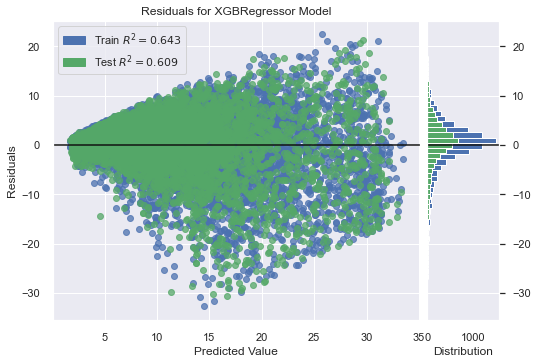

AttributeError: 'XGBRegressor' object has no attribute 'line_color'

AttributeError: 'XGBRegressor' object has no attribute 'line_color'

In [72]:
# Making the Residuals Plot
residuals_plot(xgb_reg, X_train, y_train, X_test, y_test)

In [73]:
xg_results = pd.DataFrame({'actual': y_test, 'prediction': y_pred})
xg_results['residuals'] = xg_wrapper.residuals()
xg_results

,actual,prediction,residuals
2192,1.230,15.677405,-14.447405
5967,9.700,13.295380,-3.595380
14359,14.100,20.462774,-6.362774
14122,1.770,3.969338,-2.199338
4796,3.600,4.420456,-0.820456
...,...,...,...
10874,12.086,10.224540,1.861460
250,18.560,19.439060,-0.879060
10212,6.651,11.599201,-4.948201
3166,17.400,13.676270,3.723730


In [74]:
# Durbin-Watson test to test if errors are independent

sms.stattools.durbin_watson(xg_wrapper.residuals())

1.9694121772887156

In [75]:
# Given the statistical value of 1.972,
# the test provides evidence that there is no serial correlation present
# meaning the residual error terms are uncorrelated and are independent

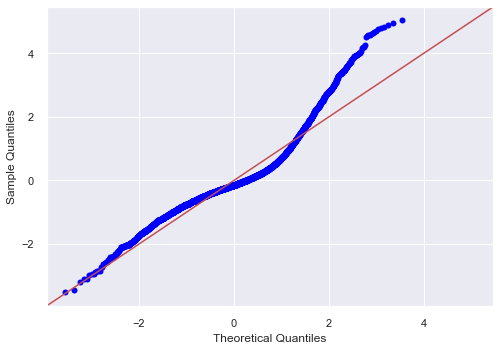

In [76]:
sm.qqplot(xg_wrapper.residuals(), stats.norm, fit=True, line="45")
plt.show()

In [77]:
xg_wrapper.print()

R2 Square: 0.6089489258170115
Mean Absolute Error: 4.136826328777922
Mean Squared Error: 36.710128279873814
Root Mean Squared Error: 6.05888836997958


In [78]:
print('TEST RESULTS')

TEST RESULTS


In [79]:
lm_wrapper.print()

R2 Square: 0.010840149088086282
Mean Absolute Error: 7.249198478698002
Mean Squared Error: 92.85790888605331
Root Mean Squared Error: 9.63628086380079


In [80]:
mlr_wrapper.print()

R2 Square: 0.49747033238568317
Mean Absolute Error: 5.018084862041558
Mean Squared Error: 47.17524073065555
Root Mean Squared Error: 6.868423453068073


In [81]:
tree_wrapper.print()

R2 Square: 0.4692093145312267
Mean Absolute Error: 4.483054556120454
Mean Squared Error: 49.82825886370747
Root Mean Squared Error: 7.058913433645965


In [82]:
rf_wrapper.print()

R2 Square: 0.7188298528240924
Mean Absolute Error: 3.3217611947594836
Mean Squared Error: 26.394997617289736
Root Mean Squared Error: 5.1376062146966595


In [83]:
xg_wrapper.print()

R2 Square: 0.6089489258170115
Mean Absolute Error: 4.136826328777922
Mean Squared Error: 36.710128279873814
Root Mean Squared Error: 6.05888836997958


In [84]:
for lambda_value in [1, 10, 50, 100]:
    # Instantiate an XGBoost object with hyperparameters
    xgb_reg = xgb.XGBRegressor(
        max_depth=3,
        n_estimators=100,
        n_jobs=2,
        objectvie='reg:squarederror',
        booster='gbtree',
        random_state=RANDOM_SEED,
        learning_rate=0.05,
        reg_lambda=lambda_value
    )

    # Train the model with train data sets
    xgb_reg.fit(X_train, y_train)

    y_pred = xgb_reg.predict(X_test)

    wrapper = ResultWrapper(
        y_test=y_test,
        y_pred=y_pred
    )
    print(f'REG LAMBDA {lambda_value}')
    print('--------------------------')
    wrapper.print()
    print('\n')

[00:03:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "objectvie" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


REG LAMBDA 1
--------------------------
R2 Square: 0.6089489258170115
Mean Absolute Error: 4.136826328777922
Mean Squared Error: 36.710128279873814
Root Mean Squared Error: 6.05888836997958


[00:03:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "objectvie" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


REG LAMBDA 10
--------------------------
R2 Square: 0.6081120609216032
Mean Absolute E